## HR Employee Attrition Analysis

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
# Load Data


HR_Employee_Data = pd.read_csv('HR_Employee_Attrition.csv')

In [3]:
# A copy of original dataset for easy retrieval incase of any mistake


HR_Employee_Attrition = HR_Employee_Data.copy() 

### Data Assessment

In [4]:
# Information about the dataset


HR_Employee_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Numbers of rows and columns


HR_Employee_Attrition.shape

(1470, 35)

In [6]:
# To check for missing values


HR_Employee_Attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# To check for duplicate values


HR_Employee_Attrition.duplicated().sum()

0

In [8]:
HR_Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
HR_Employee_Attrition.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


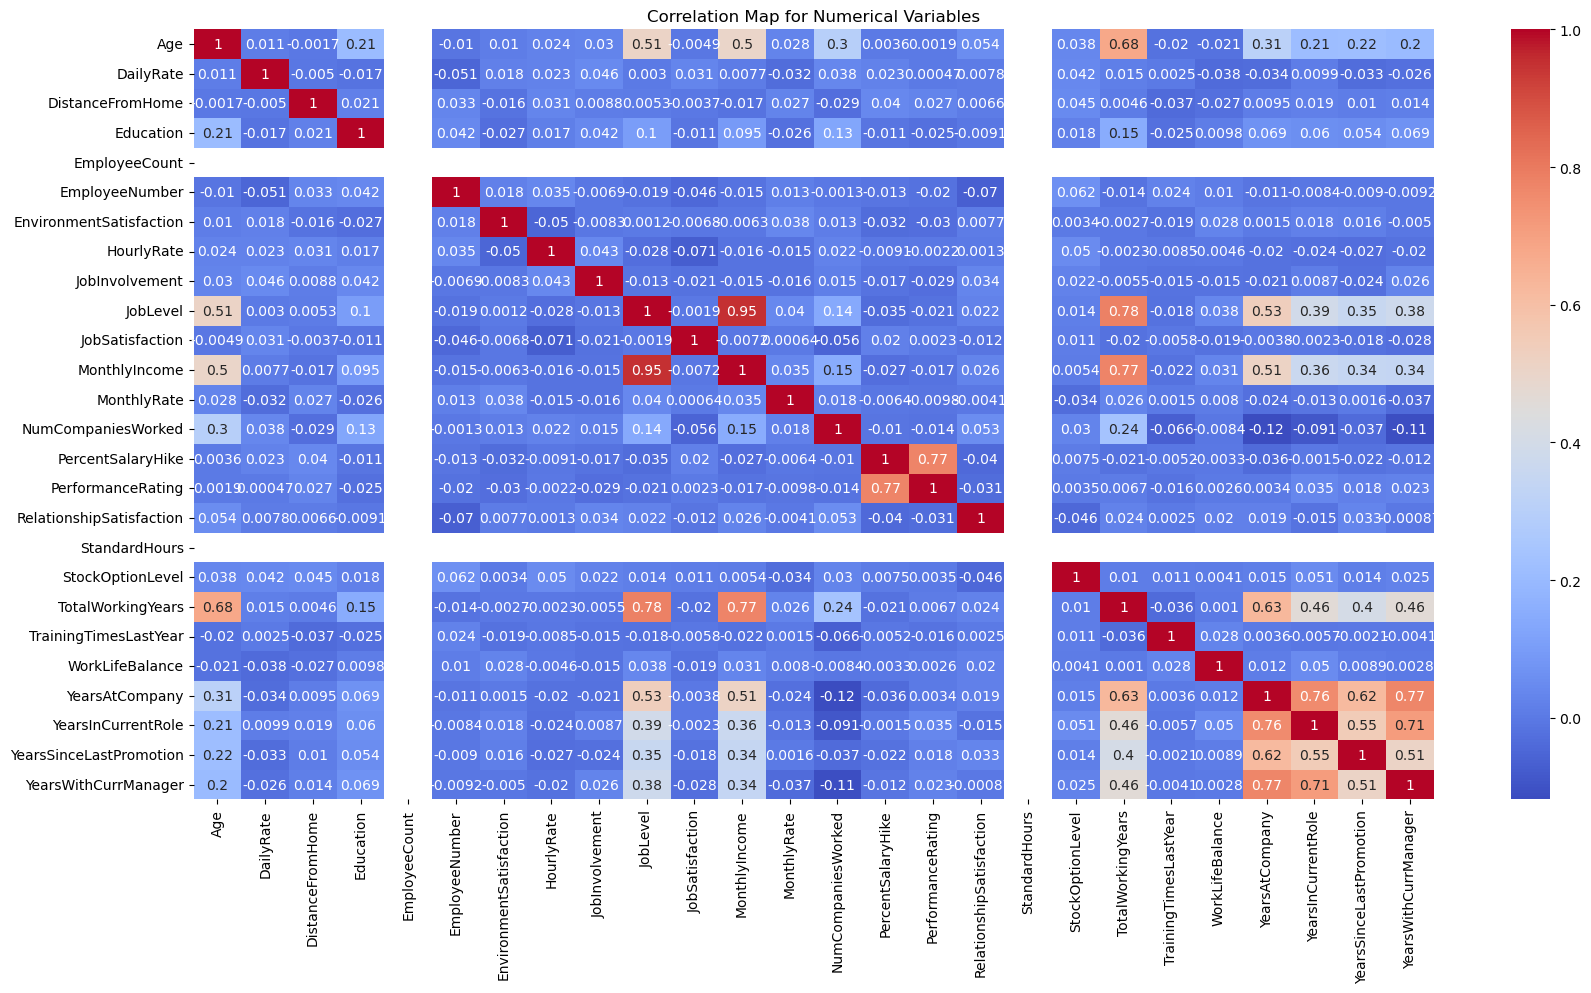

In [10]:
# Correlation map for all numeric variables


correlation_matrix = HR_Employee_Attrition.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map for Numerical Variables')
plt.show()

### Visualization of categorical variables

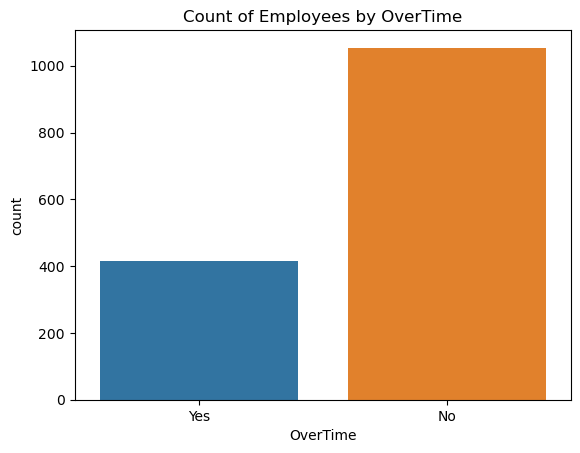

In [11]:
# OverTime


sns.countplot(x='OverTime', data=HR_Employee_Attrition)
plt.title('Count of Employees by OverTime')
plt.show()

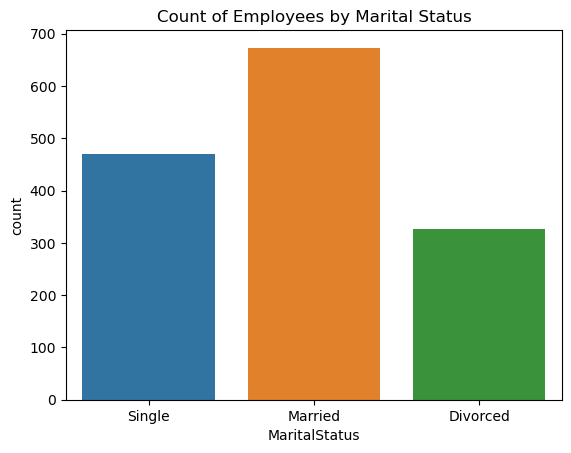

In [12]:
# Marital Status


sns.countplot(x='MaritalStatus', data=HR_Employee_Attrition)
plt.title('Count of Employees by Marital Status')
plt.show()

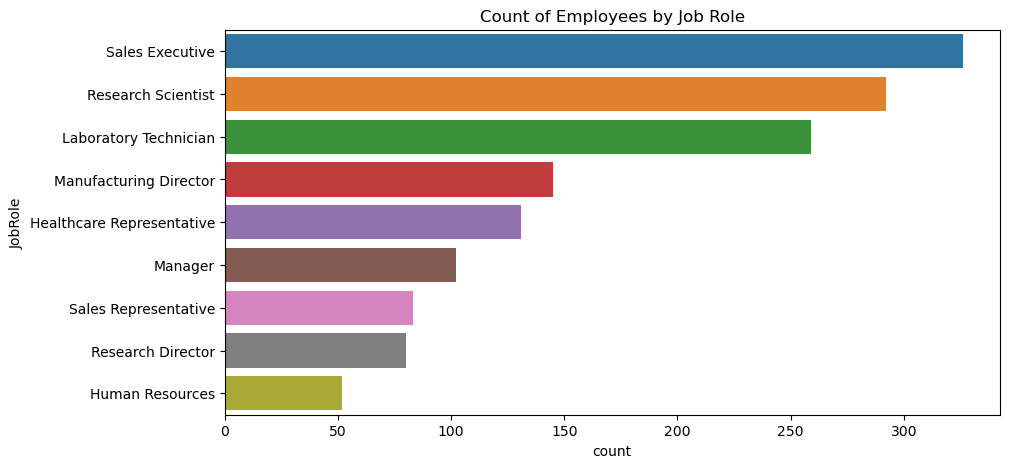

In [13]:
# Job Role


plt.figure(figsize =(10,5))
sns.countplot(y='JobRole', data=HR_Employee_Attrition)
plt.title('Count of Employees by Job Role')
plt.show()

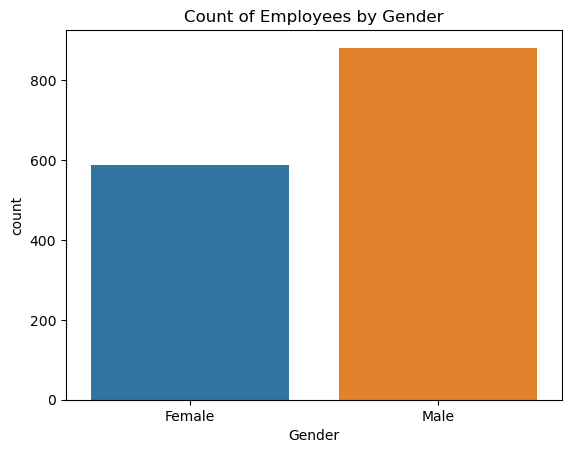

In [14]:
# Gender


sns.countplot(x='Gender', data=HR_Employee_Attrition)
plt.title('Count of Employees by Gender')
plt.show()

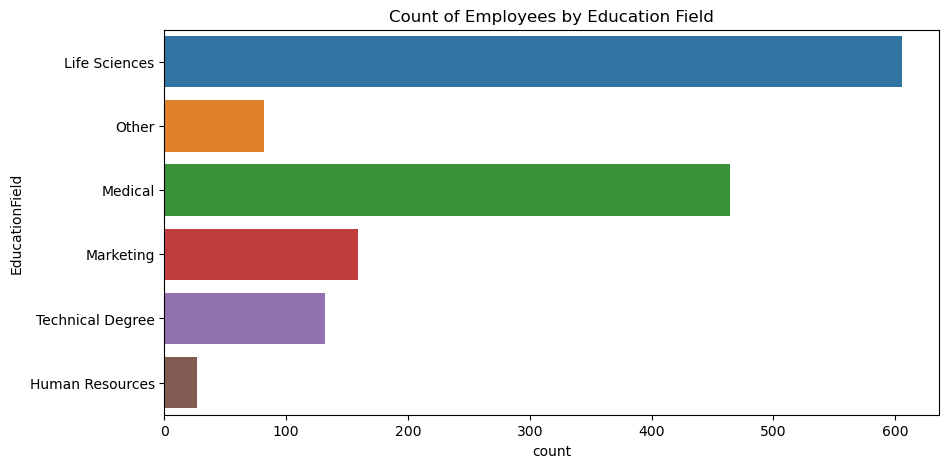

In [15]:
# Education Field


plt.figure(figsize =(10,5))
sns.countplot(y='EducationField', data=HR_Employee_Attrition)
plt.title('Count of Employees by Education Field')
plt.show()

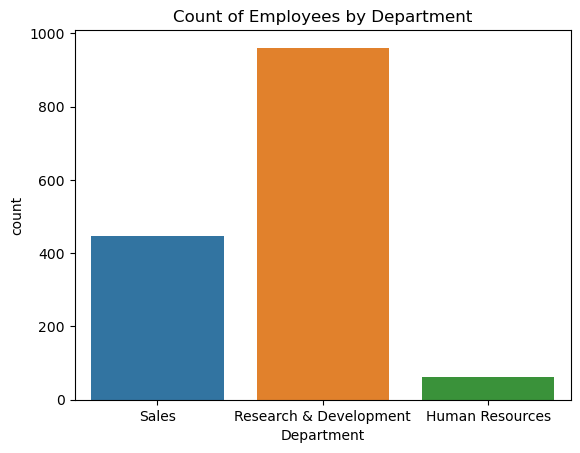

In [16]:
# Department


sns.countplot(x='Department', data=HR_Employee_Attrition)
plt.title('Count of Employees by Department')
plt.show()

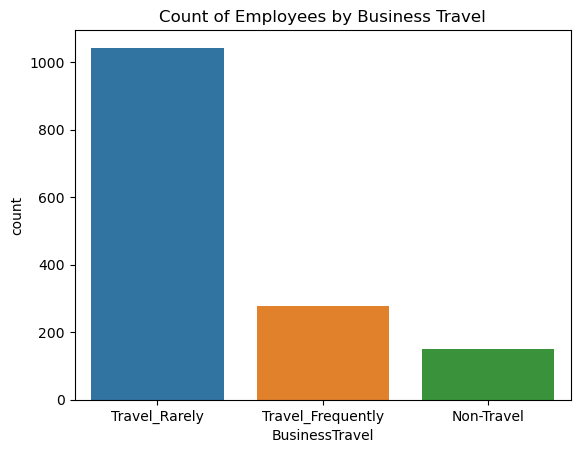

In [17]:
# Business Travel


sns.countplot(x='BusinessTravel', data=HR_Employee_Attrition)
plt.title('Count of Employees by Business Travel')
plt.show()

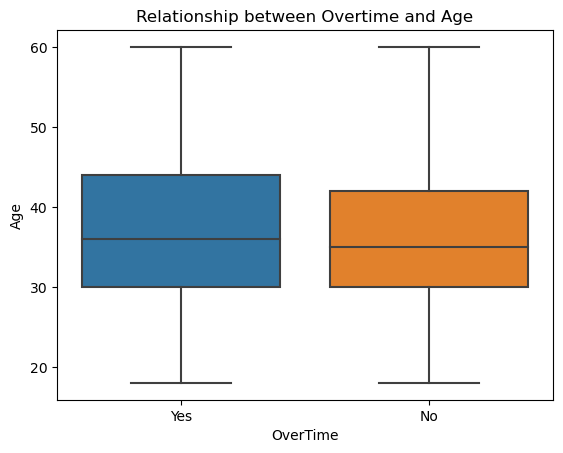

In [18]:
# Relationship between OverTime and Age


sns.boxplot(x='OverTime', y= 'Age', data=HR_Employee_Attrition)
plt.title('Relationship between Overtime and Age')
plt.show()

### Plotting of Numerical Variables

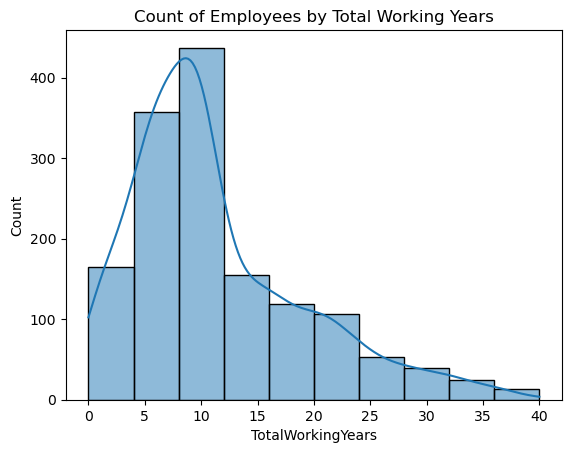

In [19]:
# Total Working Years


sns.histplot(x='TotalWorkingYears', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Total Working Years')
plt.show()

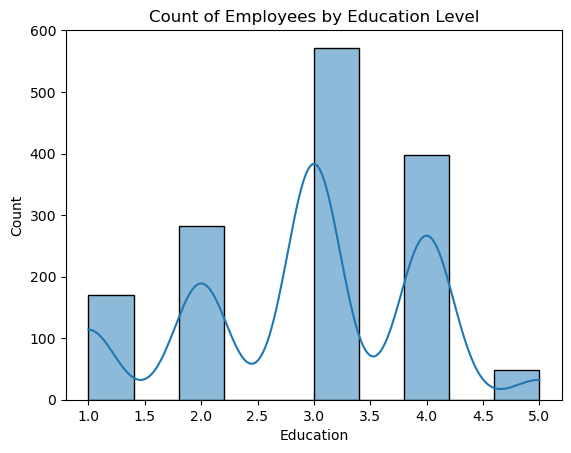

In [20]:
# Education Level


sns.histplot(x='Education', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Education Level')
plt.show()

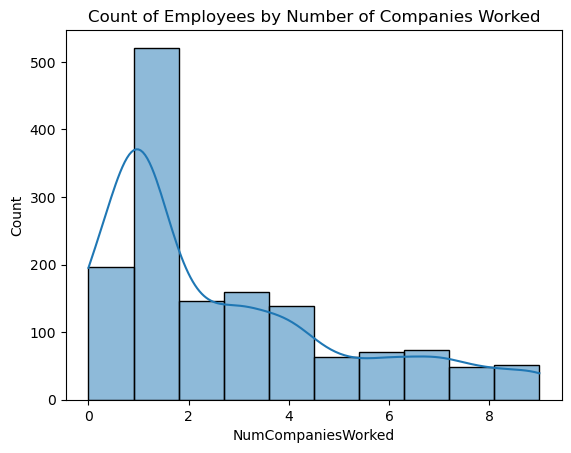

In [21]:
# Number of Companies Worked


sns.histplot(x='NumCompaniesWorked', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Number of Companies Worked')
plt.show()

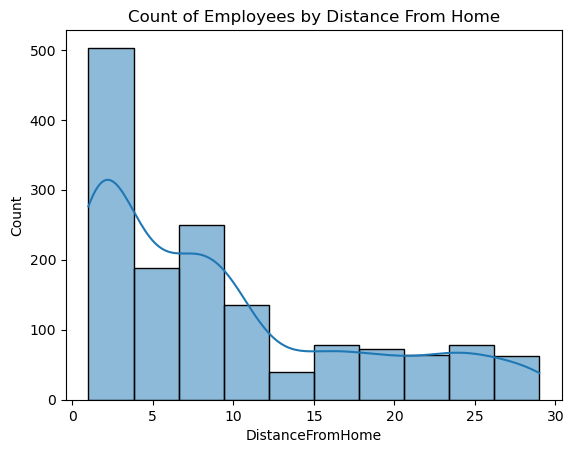

In [22]:
# Distance from Home


sns.histplot(x='DistanceFromHome', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Distance From Home')
plt.show()

### Monthly Income Analysis

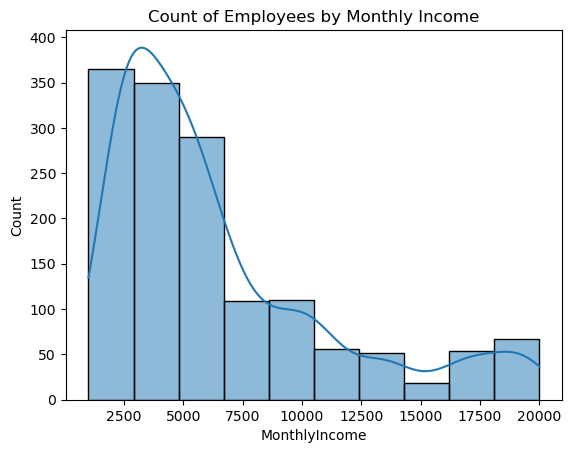

In [23]:
# Monthly Income Distribution


sns.histplot(x='MonthlyIncome', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Monthly Income')
plt.show()

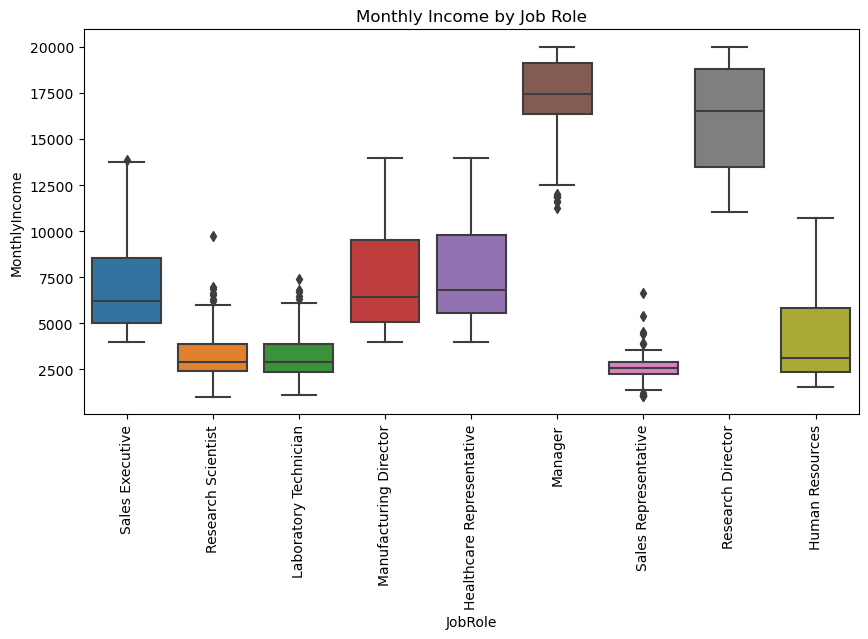

In [24]:
# Monthly Income by Job Role


plt.figure(figsize=(10,5))
sns.boxplot(x='JobRole', y= 'MonthlyIncome', data=HR_Employee_Attrition)
plt.title('Monthly Income by Job Role')
plt.xticks(rotation = 90)
plt.show()

### Employee Satisfaction and Performance

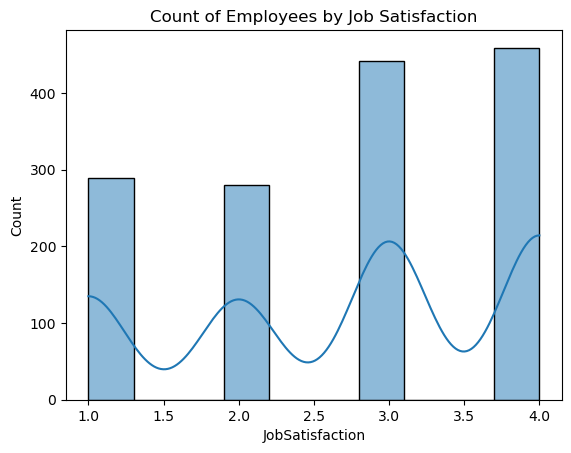

In [25]:
# Job Satisfaction Distribution


sns.histplot(x='JobSatisfaction', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Job Satisfaction')
plt.show()

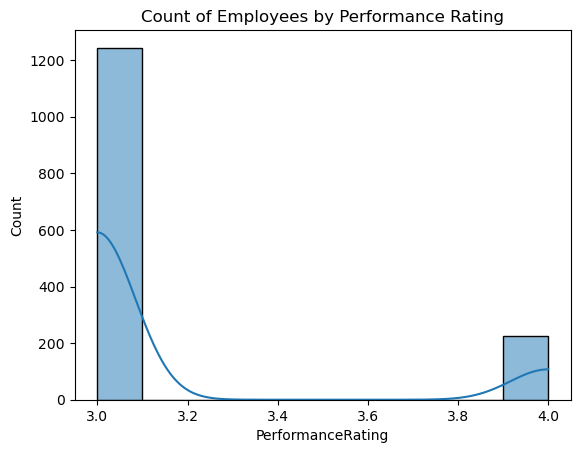

In [26]:
# Performance Rating Distribution


sns.histplot(x='PerformanceRating', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Performance Rating')
plt.show()

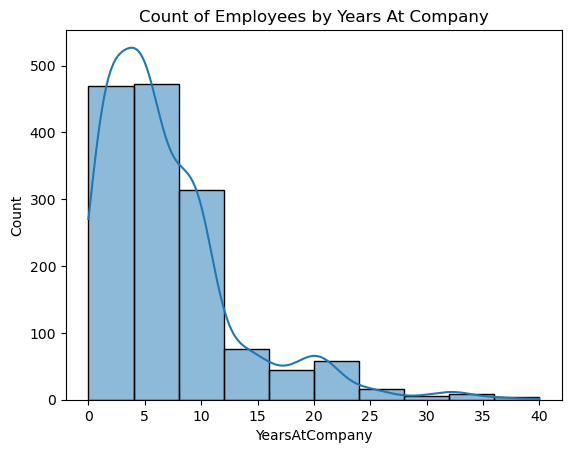

In [27]:
# Employee Tenure Distribution


sns.histplot(x='YearsAtCompany', bins=10, kde=True, data=HR_Employee_Attrition)
plt.title('Count of Employees by Years At Company')
plt.show()

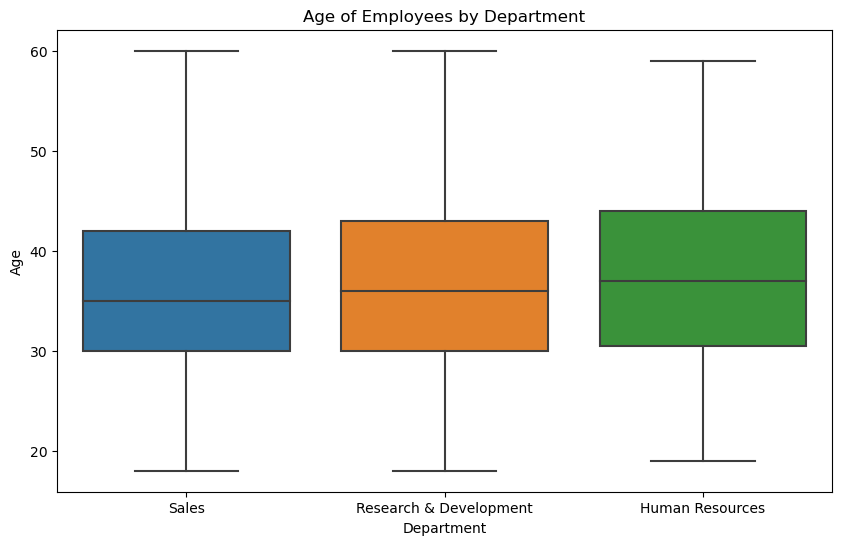

In [28]:
# Age Distribution by Department

plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y= 'Age', data=HR_Employee_Attrition)
plt.title('Age of Employees by Department')
plt.show()

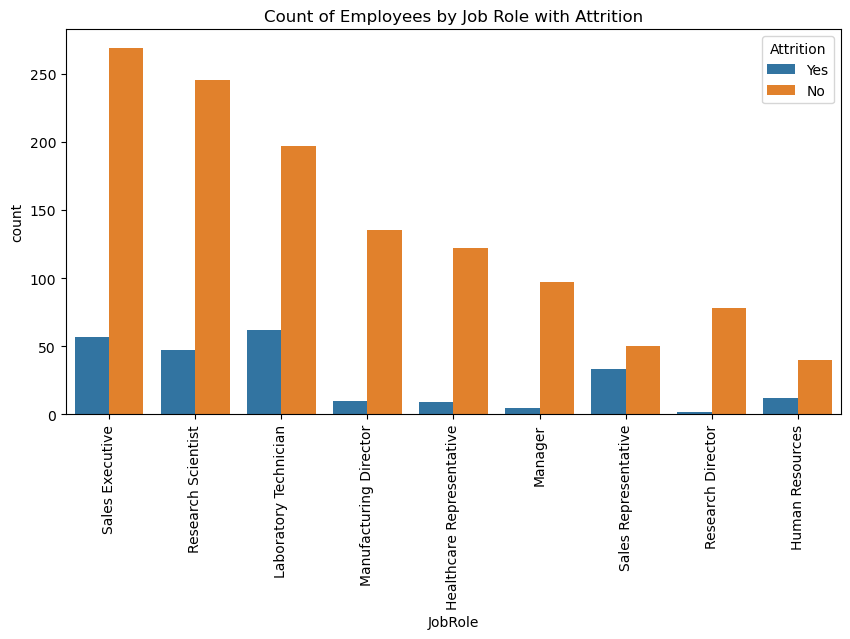

In [29]:
# Attrition by Job Role


plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', hue= 'Attrition', data=HR_Employee_Attrition)
plt.title('Count of Employees by Job Role with Attrition')
plt.xticks(rotation = 90)
plt.show()